## Setup

In [87]:
%pip uninstall -y lida 
%pip install -U python-dotenv
%pip install -U llmx
%pip install pandas
%pip install matplotlib
%pip install plotly
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
%pip show lida

Note: you may need to restart the kernel to use updated packages.


In [89]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import sys
import os
import pprint
import pickle
from dotenv import load_dotenv

load_dotenv()

False

In [5]:
sys.path.append(os.path.abspath('../..'))

In [6]:
from lida.components.manager import Manager
from llmx import TextGenerationConfig, llm

sagemaker.config INFO - Not applying SDK defaults from location: C:\ProgramData\sagemaker\sagemaker\config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: C:\Users\Admin\AppData\Local\sagemaker\sagemaker\config.yaml


In [11]:
lida = Manager(text_gen = llm("openai", api_key=os.getenv(APIKEY)))
textgen_config = TextGenerationConfig(n=1, temperature=0.5, model="gpt-4o-mini", use_cache=True)

In [12]:
import pandas as pd

df = pd.read_csv('../customer_shopping_data_original.csv')
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True, errors='coerce')

df.head()

FileNotFoundError: [Errno 2] No such file or directory: '../customer_shopping_data_original.csv'

In [13]:
df.to_csv('../customer_shopping_data.csv', index=False)


NameError: name 'df' is not defined

## Summarizer Module

### Summarize the columns
- Input: dataset
- Summary method: default
- Output: dict of information about the dataset, containing descriptions of each column

In [14]:
summary = lida.summarize("../customer_shopping_data.csv", summary_method="default", textgen_config=textgen_config)  
pprint.pprint(summary)

{'dataset_description': '',
 'field_names': ['invoice_no',
                 'customer_id',
                 'gender',
                 'age',
                 'category',
                 'quantity',
                 'price',
                 'payment_method',
                 'invoice_date',
                 'shopping_mall'],
 'fields': [{'column': 'invoice_no',
             'properties': {'description': '',
                            'dtype': 'string',
                            'groupable': False,
                            'num_unique_values': 4500,
                            'samples': ['I191610', 'I143082', 'I532064'],
                            'semantic_type': ''}},
            {'column': 'customer_id',
             'properties': {'description': '',
                            'dtype': 'string',
                            'groupable': False,
                            'num_unique_values': 4500,
                            'samples': ['C277145', 'C252015', 'C124455'],
   

### Enrich: Automatically generate descriptions for each column
- Input: dataset
- Summary method: enrich
- Output: Summarized dataset with generated descriptions

In [15]:
enriched_summary = lida.summarize("../customer_shopping_data.csv", summary_method="enrich", textgen_config=textgen_config)  
pprint.pprint(enriched_summary)

{'dataset_description': 'This dataset contains information on customer '
                        'shopping transactions, including details about '
                        'invoices, customer demographics, purchased '
                        'categories, quantities, prices, payment methods, '
                        'shopping mall locations, and transaction dates.',
 'field_names': ['invoice_no',
                 'customer_id',
                 'gender',
                 'age',
                 'category',
                 'quantity',
                 'price',
                 'payment_method',
                 'invoice_date',
                 'shopping_mall'],
 'fields': [{'column': 'invoice_no',
             'properties': {'description': 'Unique identifier for each '
                                           'shopping transaction invoice.',
                            'dtype': 'string',
                            'groupable': False,
                            'num_unique_values': 4

### Describe: Manually add descriptions for each column
- Input: dataset, dict of dataset descriptions
- Summary method: describe
- Output: dict of information about the dataset, containing descriptions of each column

In [16]:
description = {
    "dataset_description": "Welcome to the shopping world of Istanbul! Our dataset contains shopping information from 10 different shopping malls between 2021 and 2023. We have gathered data from various age groups and genders to provide a comprehensive view of shopping habits in Istanbul. The dataset includes essential information such as invoice numbers, customer IDs, age, gender, payment methods, product categories, quantity, price, order dates, and shopping mall locations. We hope that this dataset will serve as a valuable resource for researchers, data analysts, and machine learning enthusiasts who want to gain insights into shopping trends and patterns in Istanbul. Explore the dataset and discover the fascinating world of Istanbul shopping!",
    "columns" : {
        "invoice_no": "Invoice number. Nominal. A combination of the letter 'I' and a 6-digit integer uniquely assigned to each operation.",
        "customer_id": "Customer number. Nominal. A combination of the letter 'C' and a 6-digit integer uniquely assigned to each operation.",
        "gender": "String variable of the customer's gender.",
        "age": "Positive Integer variable of the customers age.",
        "category": "String variable of the category of the purchased product.",
        "quantity": "The quantities of each product (item) per transaction. Numeric.",
        "price": "Unit price. Numeric. Product price per unit in Turkish Liras (TL).",
        "payment_method": "String variable of the payment method (cash, credit card or debit card) used for the transaction.",
        "invoice_date": "Invoice date. The day when a transaction was generated.",
        "shopping_mall": "String variable of the name of the shopping mall where the transaction was made."
    }
}

In [17]:
described_summary = lida.summarize("../customer_shopping_data.csv", description=description, summary_method="describe", textgen_config=textgen_config)  
pprint.pprint(described_summary)

{'dataset_description': 'Welcome to the shopping world of Istanbul! Our '
                        'dataset contains shopping information from 10 '
                        'different shopping malls between 2021 and 2023. We '
                        'have gathered data from various age groups and '
                        'genders to provide a comprehensive view of shopping '
                        'habits in Istanbul. The dataset includes essential '
                        'information such as invoice numbers, customer IDs, '
                        'age, gender, payment methods, product categories, '
                        'quantity, price, order dates, and shopping mall '
                        'locations. We hope that this dataset will serve as a '
                        'valuable resource for researchers, data analysts, and '
                        'machine learning enthusiasts who want to gain '
                        'insights into shopping trends and patterns in '
       

## Goal Generator Module
- Summary*: summary from the summarizer
- N*: number of goals you want to generate
- Explore: list of data types you want the goals to explore. 
    - category: variables which are string or categories
    - number: variables which are numerical (int, float)
    - date: variables which are datetime
    - three: mix of three or more variables
    - two: mix of two variables
- Persona: description of your goal in exploring the dataset
- Insights: list of insights you want to generate goals for

### Generate goals (without specifications)
For this use case, we want goals that will let us openly explore our dataset without anything in mind. We do not specify data types we want to explore or any persona.

In [18]:
goals_bare_min = lida.goals(summary, n=3, textgen_config=textgen_config, explore=[])

for goal in goals_bare_min:
    display(goal)


### Goal 0
---
**Question:** How does the average price of items vary across different categories?

**Visualization:** `bar chart of average(price) grouped by category`

**Rationale:** This visualization will help identify which product categories have higher average prices, indicating potential market segments for pricing strategies. Using 'category' to group the data allows us to assess trends and differences in pricing across the various product types.



### Goal 1
---
**Question:** What is the total quantity of items sold by gender?

**Visualization:** `bar chart of sum(quantity) grouped by gender`

**Rationale:** This visualization will provide insights into purchasing behavior based on gender, revealing which gender purchases more items overall. Grouping by 'gender' allows us to compare the total quantity sold between male and female customers, which can inform targeted marketing strategies.



### Goal 2
---
**Question:** What are the trends in sales over time by shopping mall?

**Visualization:** `line chart of sum(price) over time grouped by shopping mall`

**Rationale:** This visualization will show sales trends over time for different shopping malls, allowing us to identify peak sales periods and compare performance across locations. Using 'invoice_date' for the time series and grouping by 'shopping_mall' enables a clear view of sales dynamics in the retail environment.


### Generate goals that guarantees the exploration of specific data types and/or number of variables
For this use case, we want to specify that we want certain data types to be explored in our goal exploration. This will guarantee that there will be goals that exist that contain the data types we specify. Note that this does not mean that ALL goals will be constricted to the data types you specify. It only means that you want certain data types to be explored, but other goals will be generated as well.

We can populate the `explore` dataset with the data types we want to explore. We can also put `three` if we want to generate goals that will suggest visualizations for `three` different variables.

Note below that we see goals that include `date` columns and that there are goals that mix `three` variables.

In [52]:
goals_explore = lida.goals(summary, n=5, explore=['date', 'three'], textgen_config=textgen_config)

for goal in goals_explore:
    display(goal)


### Goal 0
---
**Question:** How does the average price of items purchased vary over time?

**Visualization:** `Line chart of average price grouped by invoice_date`

**Rationale:** This visualization will show trends in average spending over time, allowing us to identify any seasonal patterns or shifts in consumer behavior. By grouping the data by 'invoice_date' and calculating the average 'price', we can gain insights into how pricing strategies may affect customer purchasing decisions throughout the specified date range from '1/1/2021' to '9/9/2022'. A line chart is chosen here as it effectively illustrates changes over time, making it easy to spot trends.



### Goal 1
---
**Question:** How does the average price of products differ by gender and shopping mall?

**Visualization:** `bar chart of average(price) grouped by gender and shopping_mall`

**Rationale:** This visualization will provide insights into spending patterns based on gender across different shopping malls. By aggregating the average price of products purchased (price) and grouping it by both gender and shopping_mall, we can identify if certain malls attract higher spending from a specific gender. A bar chart is chosen here as it effectively compares the average prices across multiple categories, making it easy to discern trends and differences.



### Goal 2
---
**Question:** What is the average price of products purchased by gender?

**Visualization:** `bar chart of average price grouped by gender`

**Rationale:** This visualization will show the average price of products purchased by each gender, using the 'price' and 'gender' fields. It helps in understanding gender-based spending patterns, which can inform targeted marketing strategies.



### Goal 3
---
**Question:** How does the quantity of products purchased vary by category?

**Visualization:** `bar chart of total quantity grouped by category`

**Rationale:** This visualization will display the total quantity of products purchased for each category, utilizing the 'quantity' and 'category' fields. It provides insights into consumer preferences and can guide inventory decisions.



### Goal 4
---
**Question:** What are the trends in shopping frequency over time?

**Visualization:** `line chart of invoice count over time grouped by invoice_date`

**Rationale:** This visualization will show the number of invoices over time, leveraging the 'invoice_date' field. It helps in identifying trends in shopping frequency, which can be useful for understanding seasonality and planning promotions.


### Generate goals with a persona
For this use case, we want to specify our goal for our EDA so that LIDA can generate goals that will allow us to achieve our goal. 
Note below that we can see that the goals are tailored for our specific goal, more so than if we do not specify the persona.

In [56]:
persona = "A data analyst from Mall of Istanbul who wants to create a marketing strategy to promote the use of credit cards in the Mall of Istanbul"
goals_persona = lida.goals(summary, n=3, persona=persona, textgen_config=textgen_config, explore=[])

for goal in goals_persona:
    display(goal)


### Goal 0
---
**Question:** What is the average price of items purchased using credit cards compared to other payment methods at Mall of Istanbul?

**Visualization:** `bar chart of average(price) grouped by payment_method`

**Rationale:** This visualization will help us understand how credit card users differ in spending compared to cash and debit card users. By grouping the average price by payment_method, we can identify if promoting credit card usage could lead to higher sales per transaction.



### Goal 1
---
**Question:** How does the quantity of items purchased vary by gender at Mall of Istanbul?

**Visualization:** `bar chart of sum(quantity) grouped by gender`

**Rationale:** This visualization will reveal purchasing behavior differences between male and female customers. Understanding the quantity of items purchased by gender can help tailor marketing strategies to engage both demographics more effectively, especially if there are significant differences.



### Goal 2
---
**Question:** Which product categories are most popular among credit card users at Mall of Istanbul?

**Visualization:** `bar chart of count(invoice_no) grouped by category filtered by payment_method = 'Credit Card'`

**Rationale:** This visualization will identify which categories attract credit card users, allowing for targeted promotions in those areas. By counting the number of invoices grouped by category for credit card transactions, we can infer which products might benefit from marketing campaigns aimed at increasing credit card usage.


### Generate goals related to an insight
For this use case, we have an insight about our data that we want to explore further. Note that the goals generated are now related to the insight that we provided.

In [60]:
goals_insight = lida.goals(summary, n=3, insights=["It looks like females tend to want to go to specific malls more than others"], textgen_config=textgen_config, explore=[])

for goal in goals_insight:
    display(goal)

Insight(insight='It looks like females tend to want to go to specific malls more than others', prompts=[], answers=[], index=0)



### Goal 0
---
**Question:** How does the average quantity purchased by females compare across different shopping malls?

**Visualization:** `bar chart of average(quantity) grouped by shopping_mall, filtered by gender = 'Female'`

**Rationale:** This is crucial because it will help us understand if there are specific malls where female customers tend to buy more items. Using this visualization will show if females typically purchase larger quantities compared to other malls, validating the insight about their preferences.



### Goal 1
---
**Question:** What is the average price of items purchased by females in comparison to males across different categories?

**Visualization:** `bar chart of average(price) grouped by category, filtered by gender`

**Rationale:** This is important as it will reveal if there are significant differences in spending behavior between genders. By examining the average price of items purchased, we can determine if females are willing to spend more in certain categories, which may explain their mall preferences.



### Goal 2
---
**Question:** How does the frequency of visits to specific malls differ between age groups of female customers?

**Visualization:** `bar chart of count(invoice_no) grouped by shopping_mall and age, filtered by gender = 'Female'`

**Rationale:** This visualization will help us identify which age groups of female customers prefer certain malls, providing insights into demographic trends. Understanding these preferences can further explain the insight regarding females' tendency to visit specific malls.


In [49]:
with open('./pickle files/goals_bare_min.pkl', 'rb') as f:
    goals_bare_min = pickle.load(f)

with open('./pickle files/goals_explore.pkl', 'rb') as f:
    goals_explore = pickle.load(f)
    
with open('./pickle files/goals_persona.pkl', 'rb') as f:
    goals_persona = pickle.load(f)
    
with open('./pickle files/goals_insight.pkl', 'rb') as f:
    goals_insight = pickle.load(f)

display(goals_bare_min)
display(goals_explore)
display(goals_persona)
display(goals_insight)

[Goal(question='What is the average price of products purchased by gender?', visualization='bar chart of average price grouped by gender', rationale="This visualization will show the average price of products purchased by each gender, using the 'price' and 'gender' fields. It helps in understanding gender-based spending patterns, which can inform targeted marketing strategies.", index=0),
 Goal(question='How does the quantity of products purchased vary by category?', visualization='bar chart of total quantity grouped by category', rationale="This visualization will display the total quantity of products purchased for each category, utilizing the 'quantity' and 'category' fields. It provides insights into consumer preferences and can guide inventory decisions.", index=1),
 Goal(question='What are the trends in shopping frequency over time?', visualization='line chart of invoice count over time grouped by invoice_date', rationale="This visualization will show the number of invoices over 

[Goal(question='How does the average price of items purchased vary over time?', visualization='Line chart of average price grouped by invoice_date', rationale="This visualization will show trends in average spending over time, allowing us to identify any seasonal patterns or shifts in consumer behavior. By grouping the data by 'invoice_date' and calculating the average 'price', we can gain insights into how pricing strategies may affect customer purchasing decisions throughout the specified date range from '1/1/2021' to '9/9/2022'. A line chart is chosen here as it effectively illustrates changes over time, making it easy to spot trends.", index=0),
 Goal(question='How does the average price of products differ by gender and shopping mall?', visualization='bar chart of average(price) grouped by gender and shopping_mall', rationale='This visualization will provide insights into spending patterns based on gender across different shopping malls. By aggregating the average price of products

[Goal(question='What is the average price of items purchased using credit cards compared to other payment methods at Mall of Istanbul?', visualization='bar chart of average(price) grouped by payment_method', rationale='This visualization will help us understand how credit card users differ in spending compared to cash and debit card users. By grouping the average price by payment_method, we can identify if promoting credit card usage could lead to higher sales per transaction.', index=0),
 Goal(question='How does the quantity of items purchased vary by gender at Mall of Istanbul?', visualization='bar chart of sum(quantity) grouped by gender', rationale='This visualization will reveal purchasing behavior differences between male and female customers. Understanding the quantity of items purchased by gender can help tailor marketing strategies to engage both demographics more effectively, especially if there are significant differences.', index=1),
 Goal(question='Which product categories

[Goal(question='How does the average quantity purchased by females compare across different shopping malls?', visualization="bar chart of average(quantity) grouped by shopping_mall, filtered by gender = 'Female'", rationale='This is crucial because it will help us understand if there are specific malls where female customers tend to buy more items. Using this visualization will show if females typically purchase larger quantities compared to other malls, validating the insight about their preferences.', index=0),
 Goal(question='What is the average price of items purchased by females in comparison to males across different categories?', visualization='bar chart of average(price) grouped by category, filtered by gender', rationale='This is important as it will reveal if there are significant differences in spending behavior between genders. By examining the average price of items purchased, we can determine if females are willing to spend more in certain categories, which may explain th

## Viz Generator Module

### Generate a visualization from a goal

For this use case, we select a goal that was generated previously. The goal is:

**Question:** Which product categories are most popular among credit card users at Mall of Istanbul?

**Visualization:** `bar chart of count(invoice_no) grouped by category filtered by payment_method = 'Credit Card'`

**Rationale:** This visualization will identify which categories attract credit card users, allowing for targeted promotions in those areas. By counting the number of invoices grouped by category for credit card transactions, we can infer which products might benefit from marketing campaigns aimed at increasing credit card usage.



<string>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



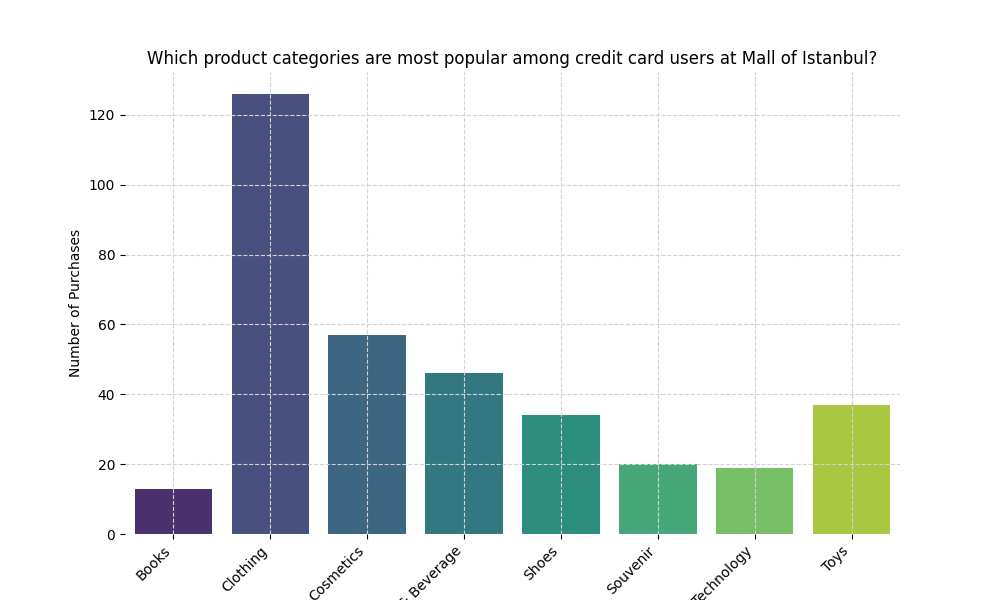

In [50]:
goal_charts = lida.visualize(summary=summary, goal=goals_persona[2], textgen_config=textgen_config)  
goal_charts[0]

### Generate a visualization from a custom prompt

For this use case, we provide our own prompt that we want to create a chart with.

<string>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


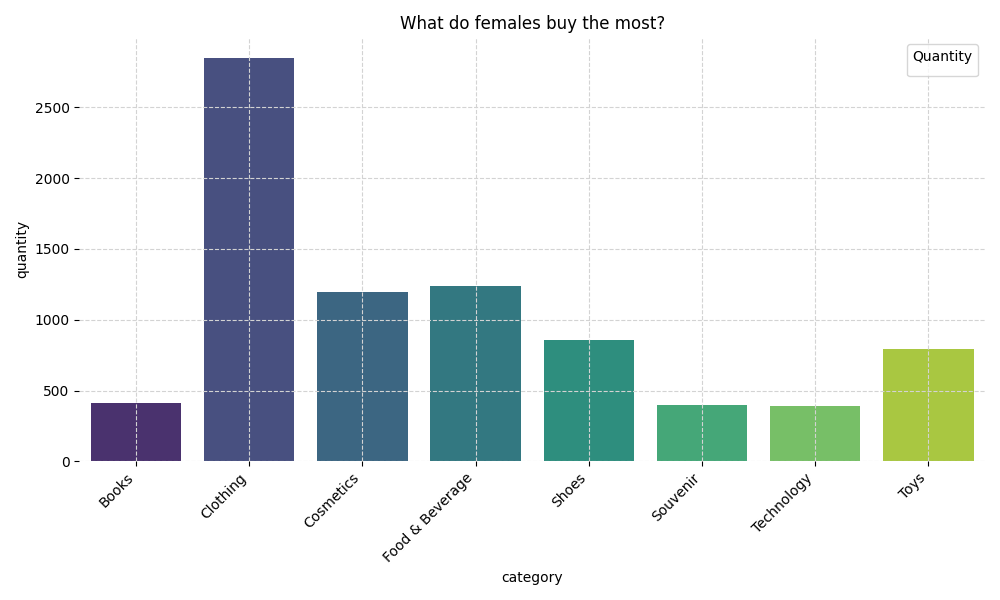

In [51]:
custom_chart = lida.visualize(summary=summary, goal="What do females buy the most?", textgen_config=textgen_config)  
custom_chart[0]

### Edit a visualization
Given a visualization, we have the option to edit it as well to match our specifications. There will be cases when the chart generated is not easily readable. This will be useful to manipulate it if there is something specific that you want to see.

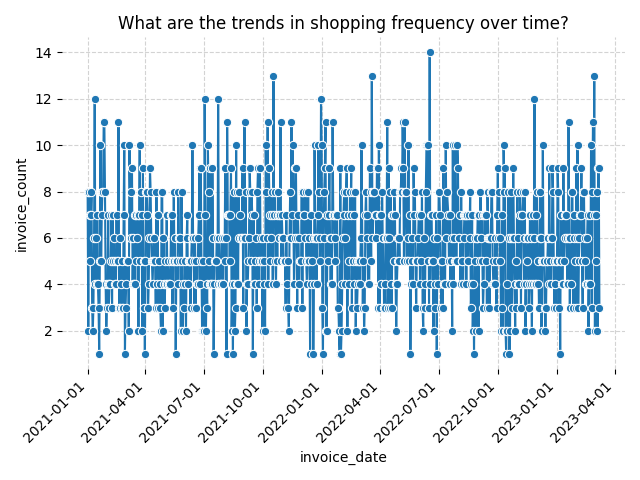

In [52]:
goal_charts2 = lida.visualize(summary=summary, goal=goals_bare_min[2], textgen_config=textgen_config)  
goal_charts2[0]

In [123]:
goal_charts2_code = goal_charts2[0].code
# instructions = ["focus on May 2021", "split by gender", "remove start and end of may lines", "move legend to top right", "change female to red and male to green"]
instructions = ["focus on May 2021", "split the line chart to show the split of invoices per day per gender"]
edited_charts = lida.edit(code=goal_charts2_code,  summary=summary, instructions=instructions, textgen_config=textgen_config)
edited_charts[0]

```python
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# solution plan
# i. Convert 'invoice_date' to datetime format
# ii. Filter data for May 2021
# iii. Group by 'invoice_date' and 'gender' and count the number of invoices
# iv. Plot a line chart of invoice count over time, split by gender

def plot(data: pd.DataFrame): #ALWAYS INCLUDE THIS.
    data['invoice_date'] = pd.to_datetime(data['invoice_date'], errors='coerce')
    data = data[pd.notna(data['invoice_date'])]
    data['invoice_date'] = data['invoice_date'].dt.date
    
    # Filter for May 2021
    data = data[(data['invoice_date'] >= pd.to_datetime('2021-05-01')) & 
                (data['invoice_date'] <= pd.to_datetime('2021-05-31'))]
    
    invoice_counts = data.groupby(['invoice_date', 'gender']).size().reset_index(name='invoice_count')

    sns.lineplot(data=invoice_counts, x='invoice_date', y='invoice_count', hue='gender', m

"import seaborn as sns\nimport pandas as pd\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom matplotlib.dates import DateFormatter\n\n# solution plan\n# i. Convert 'invoice_date' to datetime format\n# ii. Filter data for May 2021\n# iii. Group by 'invoice_date' and 'gender' and count the number of invoices\n# iv. Plot a line chart of invoice count over time, split by gender\n\ndef plot(data: pd.DataFrame): #ALWAYS INCLUDE THIS.\n    data['invoice_date'] = pd.to_datetime(data['invoice_date'], errors='coerce')\n    data = data[pd.notna(data['invoice_date'])]\n    data['invoice_date'] = data['invoice_date'].dt.date\n    \n    # Filter for May 2021\n    data = data[(data['invoice_date'] >= pd.to_datetime('2021-05-01')) & \n                (data['invoice_date'] <= pd.to_datetime('2021-05-31'))]\n    \n    invoice_counts = data.groupby(['invoice_date', 'gender']).size().reset_index(name='invoice_count')\n\n    sns.lineplot(data=invoice_counts, x='invoice_date', y='invoice_count', h

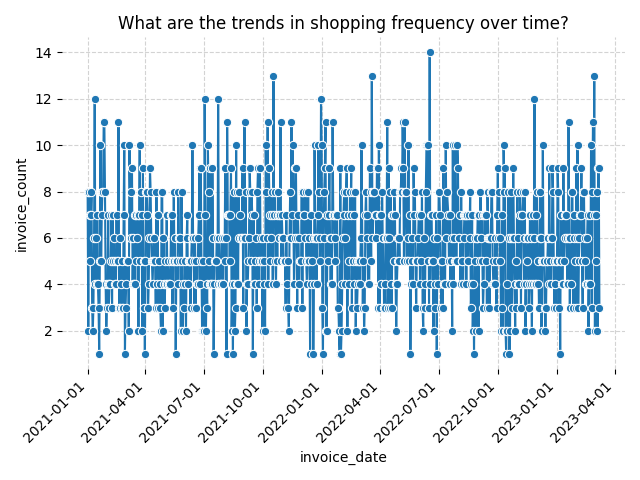

In [133]:
goal_charts2[0]

### Repair a visualization
We can also repair or improve a visualization as needed. This can be done on both code that can execute, and code that cannot execute properly (i.e., the first scenario simply tries to improve the visualization, while the second scenario tries to repair the visualization). 

This is done in two steps: evaluation, and repairing. The evaluation produced in the first step is used as the feedback input for the second step.

In [147]:
evaluations = lida.evaluate(code= edited_charts[0].code, error = edited_charts[0].error, goal=goals_bare_min[2], textgen_config=textgen_config)[0] 
for eval in evaluations:
    print(eval["dimension"], "Score" ,eval["score"], "/ 10")
    print("\t", eval["rationale"][:400])
    print("\t**********************************")

{'message': 'Cannot compare Timestamp with datetime.date. Use ts == pd.Timestamp(date) or ts.date() == date instead.', 'traceback': 'Traceback (most recent call last):\n  File "d:\\Documents\\GitHub\\Repos\\lida\\lida\\components\\executor.py", line 156, in execute\n    exec(code, ex_locals)\n  File "<string>", line 33, in <module>\n  File "<string>", line 19, in plot\n  File "C:\\Users\\Admin\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\pandas\\core\\ops\\common.py", line 76, in new_method\n    return method(self, other)\n           ^^^^^^^^^^^^^^^^^^^\n  File "C:\\Users\\Admin\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\pandas\\core\\arraylike.py", line 60, in __ge__\n    return self._cmp_method(other, operator.ge)\n           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^\n  File "C:\\Users\\Admin\\AppData\\Local\\Pack

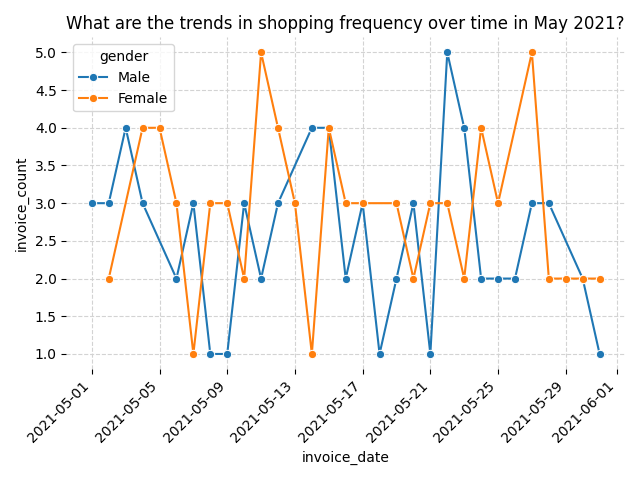

In [152]:
repaired_chart = lida.repair(code=edited_charts[0].code, goal=goals_bare_min[2], summary=summary, feedback=evaluations, textgen_config=textgen_config)
repaired_chart[0]

## Prompter

In [81]:
textgen_config = TextGenerationConfig(n=1, temperature=0.8, use_cache=True)
goal0_prompts = lida.prompt(personal_goals[0], textgen_config=textgen_config, n=5)  

for prompt in goal0_prompts:
    display(prompt)


### Prompt 0
---
**Question:** What is the most popular rideable type among casual riders?

**Rationale:** This tells us which bike type attracts casual riders the most, allowing us to focus marketing on these models.




### Prompt 1
---
**Question:** How does the usage of rideable types compare between casual riders and annual members?

**Rationale:** This reveals differences in preferences, which could indicate a potential area for improvement in member engagement.




### Prompt 2
---
**Question:** Are there specific rideable types that are significantly preferred by annual members compared to casual riders?

**Rationale:** Discovering these preferences can assist in developing targeted promotions aimed at casual riders to encourage membership.




### Prompt 3
---
**Question:** What trends can we observe in rideable type usage over different time periods for both member categories?

**Rationale:** Understanding seasonal trends can guide resource allocation and promotional efforts throughout the year.




### Prompt 4
---
**Question:** Does the frequency of rideable type usage differ significantly between casual riders and annual members?

**Rationale:** This insight can help identify the loyalty and engagement levels of different rider categories, potentially informing retention strategies.



#### Prompts: Save and Load

In [82]:
# # SAVE

# with open('./cyclist/goal0-personal/prompts.pkl', 'wb') as f:
#     pickle.dump(goal0_prompts, f)

In [83]:
# LOAD

with open('./cyclist/goal0-personal/prompts.pkl', 'rb') as f:
    goals0_prompts = pickle.load(f)

display(goals0_prompts)

[Prompt(question='What is the most popular rideable type among casual riders?', rationale='This tells us which bike type attracts casual riders the most, allowing us to focus marketing on these models.', index=0),
 Prompt(question='How does the usage of rideable types compare between casual riders and annual members?', rationale='This reveals differences in preferences, which could indicate a potential area for improvement in member engagement.', index=1),
 Prompt(question='Are there specific rideable types that are significantly preferred by annual members compared to casual riders?', rationale='Discovering these preferences can assist in developing targeted promotions aimed at casual riders to encourage membership.', index=2),
 Prompt(question='What trends can we observe in rideable type usage over different time periods for both member categories?', rationale='Understanding seasonal trends can guide resource allocation and promotional efforts throughout the year.', index=3),
 Prompt

#### Answers: From User

In [84]:
goal0_answers=[
    "The most popular ridable type among casual riders are classic bikes, then electric bikes, then docked bikes.",
    "None of the members use a docked type, and both casual and members use classic bikes the most, follower by electric bikes. However, more members use classic bikes over casual users, but more casual users use electric bikes over members.",
    "Well, it's not significantly preferred by annual members since the difference is only 200, but more annual members use classic bikes over casual members. Other than that, casual members use the other two types more than annual members.",
    "The chart doesn't show any information about time.",
    "They don't differ significantly."
]

#### Insights: Generate

In [85]:
goal0_insights = lida.insights(goal=personal_goals[0], answers=goal0_answers, prompts=goal0_prompts, n=10)

for insight in goal0_insights:
    display(insight)


### Insight 0
---
**Insight:** The preference for classic bikes among both casual riders and annual members suggests that this type of bike may be perceived as more reliable or versatile, potentially indicating a market opportunity for promoting classic bikes in marketing campaigns.



### Insight 1
---
**Insight:** The fact that casual riders prefer electric bikes over classic bikes, while annual members show the opposite trend, could indicate that casual riders are seeking convenience and ease of use, which electric bikes provide, while annual members may prioritize traditional biking experiences.



### Insight 2
---
**Insight:** The absence of docked bikes among both casual and annual members suggests a potential gap in the market; this could indicate that docked bikes are not meeting the needs or preferences of riders, prompting a reevaluation of their availability or marketing.



### Insight 3
---
**Insight:** The relatively small difference in classic bike usage between casual and annual members (200 users) may imply that while annual membership offers benefits, it does not significantly alter bike type preferences, suggesting that marketing strategies should focus on enhancing the value of membership.



### Insight 4
---
**Insight:** The higher usage of electric bikes among casual riders could indicate a trend towards more casual, spontaneous riding experiences, which may be influenced by urban mobility trends and the growing popularity of electric vehicles.



### Insight 5
---
**Insight:** The similar usage patterns between casual riders and annual members suggest that both groups may share common motivations for riding, such as fitness, leisure, or commuting, which could be leveraged in targeted marketing campaigns.



### Insight 6
---
**Insight:** The data indicates that while both groups prefer classic bikes, the distinct preference for electric bikes among casual riders could suggest a potential pathway for converting casual riders into annual members by promoting the benefits of classic biking experiences.



### Insight 7
---
**Insight:** The lack of significant differences in rideable type usage between casual and annual members may indicate that the current offerings are well-aligned with rider preferences, but it also raises questions about how to incentivize annual membership beyond just bike type.



### Insight 8
---
**Insight:** The trend of casual riders favoring electric bikes could reflect broader societal shifts towards sustainability and eco-friendly transportation, suggesting that marketing efforts could emphasize the environmental benefits of using electric bikes.



### Insight 9
---
**Insight:** The data suggests that while casual riders are more inclined towards electric bikes, the strong preference for classic bikes among annual members could indicate a loyalty or attachment to traditional biking culture, which could be a focal point for community-building initiatives.


#### Insights: Save and Load

In [86]:
# # SAVE

# with open('./cyclist/goal0-personal/insights.pkl', 'wb') as f:
#     pickle.dump(goal0_insights, f)

In [87]:
# LOAD

with open('./cyclist/goal0-personal/insights.pkl', 'rb') as f:
    goals0_insights = pickle.load(f)

display(goals0_insights)

[Insight(insight='The preference for classic bikes among both casual riders and annual members suggests that this type of bike may be perceived as more reliable or versatile, potentially indicating a market opportunity for promoting classic bikes in marketing campaigns.', index=0),
 Insight(insight='The fact that casual riders prefer electric bikes over classic bikes, while annual members show the opposite trend, could indicate that casual riders are seeking convenience and ease of use, which electric bikes provide, while annual members may prioritize traditional biking experiences.', index=1),
 Insight(insight='The absence of docked bikes among both casual and annual members suggests a potential gap in the market; this could indicate that docked bikes are not meeting the needs or preferences of riders, prompting a reevaluation of their availability or marketing.', index=2),
 Insight(insight='The relatively small difference in classic bike usage between casual and annual members (200 u

#### Visualization: Generate

<string>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


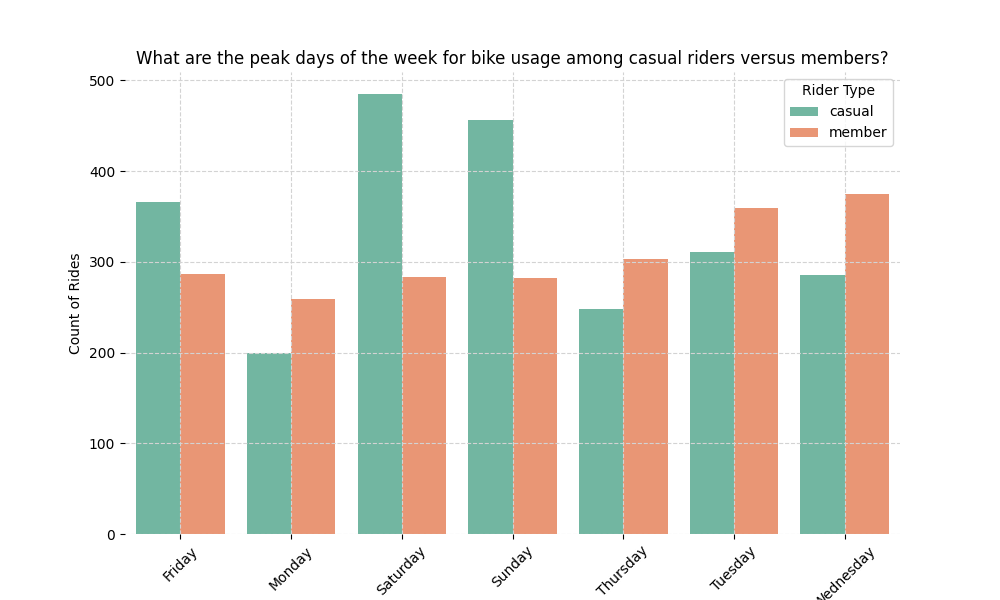

In [66]:
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
goal5_charts = lida.visualize(summary=summary, goal=personal_goals[5], textgen_config=textgen_config, library=library)  
goal5_charts[0]

#### Visualization: Save and Load

In [94]:
#### Prompts: Save and Load
# SAVE

with open('./cyclist/goal5-personal/charts.pkl', 'wb') as f:
    pickle.dump(goal5_charts, f)


In [95]:
# LOAD

with open('./cyclist/goal5-personal/charts.pkl', 'rb') as f:
    goal5_charts = pickle.load(f)

display(goal5_charts)

[ChartExecutorResponse(spec=None, status=True, raster='iVBORw0KGgoAAAANSUhEUgAAA+gAAAJYCAYAAADxHswlAAAAP3RFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMS5wb3N0MSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8kixA/AAAACXBIWXMAAA9hAAAPYQGoP6dpAACxPklEQVR4nOzdeXgV5fn/8c/MyQZkhywEIUEImCACQlUQxIWC4oZSKYqKiktVpCriUquC2qq01q1o1a+iVlyqretPRcCNXQRBgQhhC5UQCCQBApLlzPP7g+aQQxIWBWbCvF/X5SXnPpMz9zNn5jlzz/KMZYwxAgAAAAAArrLdTgAAAAAAAFCgAwAAAADgCRToAAAAAAB4AAU6AAAAAAAeQIEOAAAAAIAHUKADAAAAAOABFOgAAAAAAHgABToAAAAAAB5AgQ4AAAAAgAdQoAMAAAAA4AEU6AAAAAAAeAAFOgAAAAAAHkCBDgAAAACAB1CgAwAAAADgARToAAAAAAB4AAU6AAAAAAAeQIEOAAAAAIAHUKADAAAAAOABFOgAAAAAAHgABToAAAAAAB5AgQ4AAAAAgAdQoAMAAAAA4AEU6AAAAAAAeAAFOgAAAAAAHkCBDgAAAACAB1CgAwAAAADgARToAAAAAAB4AAU6AAAAAAAeQIEOAAAAAIAHUKADAAAAAOABFOgAAAAAAHgABToAAAAAAB5AgQ4AAAAAgAdQoAMAAAAA4AEU6AAAAAAAeAAFOgAAAAAAHkCBDgAAAACAB1CgAwAAAADgARToAAAAAAB4AAU6AAAAAAAeQIEOAAAAAIAHUKADAAAAAOABFOgAAAAAAHgABToAAAAAAB5AgQ4AAAAAgAdQoAMAAAAA4AEU6AAAAAAAeAAFOgAAAAAAHkCBDgAAAACAB1CgA42MZVkaO3bsIZ/PFVdcodjY2EM+n

#### Prompts: Generate

In [91]:
textgen_config = TextGenerationConfig(n=1, temperature=0.8, use_cache=True)
goal5_prompts = lida.prompt(personal_goals[5], textgen_config=textgen_config, n=5)  

for prompt in goal5_prompts:
    display(prompt)


### Prompt 0
---
**Question:** Which day of the week shows the highest overall bike usage?

**Rationale:** Identifying the peak day of usage will help in understanding when to allocate resources and promote services effectively.




### Prompt 1
---
**Question:** How does bike usage differ between casual riders and members on weekends versus weekdays?

**Rationale:** This will provide insights into the behavioral patterns of different rider types, aiding in customized marketing strategies.




### Prompt 2
---
**Question:** Are there any significant trends or patterns in bike usage on specific days over time?

**Rationale:** Analyzing trends can help identify if certain events or changes have influenced bike usage, guiding future operational decisions.




### Prompt 3
---
**Question:** What percentage of total bike usage does each rider type contribute on peak usage days?

**Rationale:** Understanding the share of each rider type on peak days can help tailor promotions and services to maximize engagement.




### Prompt 4
---
**Question:** How does the bike usage on the highest peak day compare to the lowest peak day for each rider type?

**Rationale:** This comparison will reveal the variability in usage and help in planning for capacity and resource allocation.



#### Prompts: Save and Load

In [92]:
# # SAVE

# with open('./cyclist/goal5-personal/prompts.pkl', 'wb') as f:
#     pickle.dump(goal5_prompts, f)

In [93]:
# LOAD

with open('./cyclist/goal5-personal/prompts.pkl', 'rb') as f:
    goals5_prompts = pickle.load(f)

display(goals5_prompts)

[Prompt(question='Which day of the week shows the highest overall bike usage?', rationale='Identifying the peak day of usage will help in understanding when to allocate resources and promote services effectively.', index=0),
 Prompt(question='How does bike usage differ between casual riders and members on weekends versus weekdays?', rationale='This will provide insights into the behavioral patterns of different rider types, aiding in customized marketing strategies.', index=1),
 Prompt(question='Are there any significant trends or patterns in bike usage on specific days over time?', rationale='Analyzing trends can help identify if certain events or changes have influenced bike usage, guiding future operational decisions.', index=2),
 Prompt(question='What percentage of total bike usage does each rider type contribute on peak usage days?', rationale='Understanding the share of each rider type on peak days can help tailor promotions and services to maximize engagement.', index=3),
 Promp

#### Answers: From User

In [96]:
goal5_answers=[
    "It seems like Saturday has the most overall bike usage, followed by sunday and then monday.",
    "On weekends, casual bike riders tend to increase compared to other casual bike rider usage in weekdays. On the other hand, members tend to be more consistent throughout the week and actually, member usage peaks on wednesdays and tuesdays and thursdays in order. This is in contrast to casual users, which peak on saturdays and sundays and fridays in order.",
    "Casual users tend to decrease as it strays away from weekends, with there being the least to most casual users on monday, thursday, wednesday, tuesday, friday, sunday and saturday in order from least to most. On the other hand, Members tend to use bicycles the most in the middle of the week with there being least to most member users on monday, saturday, friday, sunday, thursday, tuesday and wednesday in order.",
    "In peak usage days, which are saturday and sunday, casual users contribute around 5/8 of the users on saturday amd 4/7 of the users on sunday. That's just an estimate though.",
    "On the peak day of saturday, there are more casual users than members while on the least peak day of monday, there are more member users than casual users."
]

#### Insights: Generate

In [97]:
goal5_insights = lida.insights(goal=personal_goals[5], answers=goal5_answers, prompts=goal5_prompts, n=10)

for insight in goal5_insights:
    display(insight)


### Insight 0
---
**Insight:** The high bike usage on Saturdays suggests that casual riders may be using bikes for leisure activities, possibly indicating a cultural trend where weekends are reserved for recreational outings.



### Insight 1
---
**Insight:** The contrast in usage patterns between casual riders and members highlights a potential segmentation in the biking community, where casual riders are more inclined to use bikes for leisure on weekends, while members may rely on biking as a consistent mode of transportation during the week.



### Insight 2
---
**Insight:** The peak in member usage on Wednesdays could suggest that this day is favored for commuting or errands, possibly due to mid-week work patterns, while the drop in casual usage indicates a preference for weekend leisure.



### Insight 3
---
**Insight:** The significant contribution of casual users to total bike usage on weekends (5/8 on Saturday) implies that marketing efforts targeting casual riders could be more effective if focused on weekend activities, such as events or promotions.



### Insight 4
---
**Insight:** The decrease in casual riders as the week progresses may indicate that casual biking is perceived as a weekend activity, which could inform strategies for increasing weekday casual usage through targeted promotions or events.



### Insight 5
---
**Insight:** The higher member usage on Mondays compared to casual riders suggests that members may be using bikes as a reliable commuting option, indicating a potential opportunity to convert casual riders into members by promoting the benefits of membership.



### Insight 6
---
**Insight:** The pattern of member usage peaking mid-week could reflect a work-life balance trend, where individuals are more likely to bike to work during the week, suggesting that bike-sharing services could partner with local businesses to encourage this behavior.



### Insight 7
---
**Insight:** The overall trend of casual riders peaking on weekends and members peaking mid-week could indicate a need for differentiated marketing strategies that cater to the distinct motivations of each group.



### Insight 8
---
**Insight:** The observation that casual riders are less active on weekdays could suggest that there are barriers to weekday biking, such as work commitments or lack of awareness about bike-sharing options, which could be addressed through targeted outreach.



### Insight 9
---
**Insight:** The data suggests a potential opportunity for bike-sharing services to create special weekday promotions aimed at casual riders to boost usage during the week, leveraging the existing member base as advocates.


#### Insights: Save and Load

In [107]:
# # SAVE

# with open('./cyclist/goal5-personal/insights.pkl', 'wb') as f:
#     pickle.dump(goal5_insights, f)

In [108]:
# LOAD

with open('./cyclist/goal5-personal/insights.pkl', 'rb') as f:
    goal5_insights = pickle.load(f)

display(goal5_insights)

[Insight(insight='The high bike usage on Saturdays suggests that casual riders may be using bikes for leisure activities, possibly indicating a cultural trend where weekends are reserved for recreational outings.', index=0),
 Insight(insight='The contrast in usage patterns between casual riders and members highlights a potential segmentation in the biking community, where casual riders are more inclined to use bikes for leisure on weekends, while members may rely on biking as a consistent mode of transportation during the week.', index=1),
 Insight(insight='The peak in member usage on Wednesdays could suggest that this day is favored for commuting or errands, possibly due to mid-week work patterns, while the drop in casual usage indicates a preference for weekend leisure.', index=2),
 Insight(insight='The significant contribution of casual users to total bike usage on weekends (5/8 on Saturday) implies that marketing efforts targeting casual riders could be more effective if focused on

In [68]:
display(personal_goals[17])


### Goal 17
---
**Question:** What is the average ride duration for casual riders compared to members?

**Visualization:** `bar chart comparing average ride duration calculated from started_at and ended_at for member_casual`

**Rationale:** By calculating the average ride duration for casual and member categories, we can gain insights into how long each group typically rides. This information can help us tailor marketing messages that resonate with each group, encouraging casual riders to consider the benefits of longer rides which may be more feasible with an annual membership.


<string>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<string>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



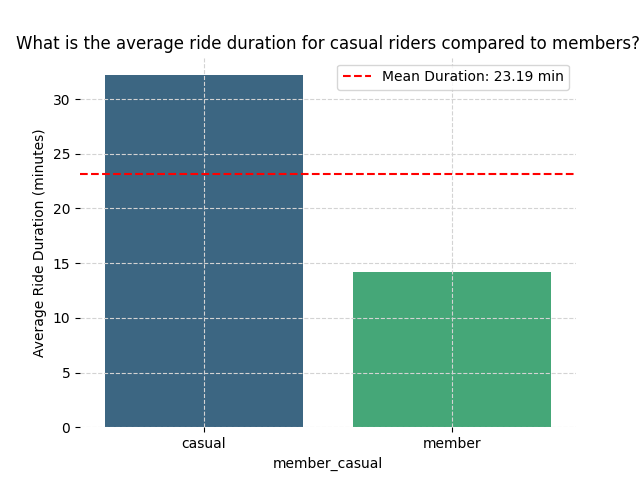

In [63]:
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
goal17_charts = lida.visualize(summary=summary, goal=personal_goals[17], textgen_config=textgen_config, library=library)  
goal17_charts[0]

### Personal Goal 15 

Question: What time of day do casual riders and members most frequently use the bikes?

Visualization: line chart showing the count of rides by hour of the day, segmented by member_casual

#### Visualization: Generate

<string>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


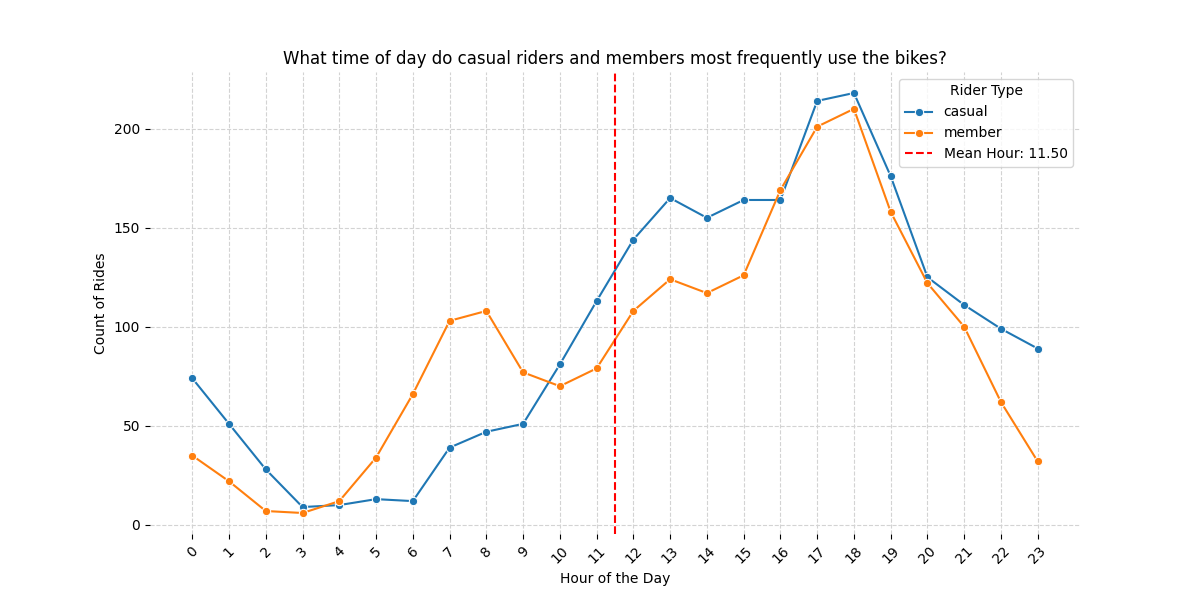

In [71]:
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
goal15_charts = lida.visualize(summary=summary, goal=personal_goals[15], textgen_config=textgen_config, library=library)  
goal15_charts[0]

#### Visualization: Save and Load

In [99]:
# # SAVE

# with open('./cyclist/goal15-personal/charts.pkl', 'wb') as f:
#     pickle.dump(goal15_charts, f)


In [100]:
# LOAD

with open('./cyclist/goal15-personal/charts.pkl', 'rb') as f:
    goal15_charts = pickle.load(f)

display(goal15_charts)

[ChartExecutorResponse(spec=None, status=True, raster='iVBORw0KGgoAAAANSUhEUgAABLAAAAJYCAYAAABy5h8aAAAAP3RFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMS5wb3N0MSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8kixA/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzdd3hT5d+A8TtJ23QPoGXTlraMsrcUkCnIUgTFgbIFBURQcP0ExYW4FwouQNFXAcGFgKiAMgRk79mCzLIK3SM57x+xsSEpPZ15pN/PdfWinJwm9zk5TdqnZxg0TdMQQgghhBBCCCGEEEJRRncHCCGEEEIIIYQQQghxLTKAJYQQQgghhBBCCCGUJgNYQgghhBBCCCGEEEJpMoAlhBBCCCGEEEIIIZQmA1hCCCGEEEIIIYQQQmkygCWEEEIIIYQQQgghlCYDWEIIIYQQQgghhBBCaTKAJYQQQgghhBBCCCGUJgNYQgghhBBCCCGEEEJpMoAlhBBCCCGEEEIIIZQmA1hCCCGEEEIIIYQQQmkygCWEEEIIIYQQQgghlCYDWEIIIYQQQgghhBBCaTKAJYQQQgghhBBCCCGUJgNYQgghhBBCCCGEEEJpMoAlhBBCCCGEEEIIIZQmA1hCCCGEEEIIIYQQQmkygCWEEEIIIYQQQgghlCYDWEIIIYQQQgghhBBCaTKAJYQQQgghhBBCCCGUJgNYQgghhBBCCCGEEEJpMoAlhBBCCCGEEEIIIZQmA1hCCCGEEEIIIYQQQmkygCWEEEIIIYQQQgghlCYDWEIIIYQQQgghhBBCaTKAJYQQQgghhBBCCCGUJgNYQgghhBBCCCGEEEJpMoAlhBBCCCGEEEIIIZQmA1hCCCGEEEIIIYQQQmkygCWEEEIIIYQQQgghlCYDWEIIIYQQQgghhBBCaTKAJYQQQgghhBBCC

#### Prompts: Generate

In [101]:
textgen_config = TextGenerationConfig(n=1, temperature=0.8, use_cache=True)
goal15_prompts = lida.prompt(personal_goals[15], textgen_config=textgen_config, n=5)  

for prompt in goal15_prompts:
    display(prompt)


### Prompt 0
---
**Question:** What hour of the day shows the highest count of rides for casual riders?

**Rationale:** This helps identify peak times for casual users, allowing targeted promotions or bike availability during those hours.




### Prompt 1
---
**Question:** How do the ride counts for members compare to casual riders across different hours?

**Rationale:** Understanding the differences in usage patterns can inform membership benefits or initiatives to attract more casual users.




### Prompt 2
---
**Question:** Are there specific hours where the gap between member and casual rider counts is the largest?

**Rationale:** Identifying these gaps can highlight opportunities to convert casual riders into members during those peak hours.




### Prompt 3
---
**Question:** What trends can we observe in ride counts for members and casual riders throughout the day?

**Rationale:** This insight can reveal overall behavior patterns and help in planning events or promotions aligned with these trends.




### Prompt 4
---
**Question:** Which hours show the lowest counts for both members and casual riders?

**Rationale:** Recognizing off-peak hours can assist in resource allocation and operational strategies, such as maintenance scheduling or promotional discounts.



#### Prompts: Save and Load

In [102]:
# # SAVE

# with open('./cyclist/goal15-personal/prompts.pkl', 'wb') as f:
#     pickle.dump(goal15_prompts, f)

In [104]:
# LOAD

with open('./cyclist/goal15-personal/prompts.pkl', 'rb') as f:
    goal15_prompts = pickle.load(f)

display(goal15_prompts)

[Prompt(question='What hour of the day shows the highest count of rides for casual riders?', rationale='This helps identify peak times for casual users, allowing targeted promotions or bike availability during those hours.', index=0),
 Prompt(question='How do the ride counts for members compare to casual riders across different hours?', rationale='Understanding the differences in usage patterns can inform membership benefits or initiatives to attract more casual users.', index=1),
 Prompt(question='Are there specific hours where the gap between member and casual rider counts is the largest?', rationale='Identifying these gaps can highlight opportunities to convert casual riders into members during those peak hours.', index=2),
 Prompt(question='What trends can we observe in ride counts for members and casual riders throughout the day?', rationale='This insight can reveal overall behavior patterns and help in planning events or promotions aligned with these trends.', index=3),
 Prompt(q

#### Answers: From User

In [105]:
goal15_answers = [
    "For both casual users and members, there are most rides (of about 225) in 18:00 and 17:00 respectively, whith casual users being a tiny bit more than members at those times. However, it's a bit notable that there's another smaller peak at around 100 for members at around 7:00 and 8:00. And there's a similar peak of around 125 for members at 13:00 and around 175 at around 13:00 for casual users.",
    "For members, it starts low at the beginning of the day, peaks at 8am, dips back at 10am, peaks at 13:00 and peaks even higher at 18:00. For casuals, it begins lower in the morning, only slowly rising at 13:00 and rising even more at 18:00. Then, they both steadily go down after 18:00. From 00:00 to 3:00, 10:00 to 16:00, 16:00 to 23:00, there are more casual rides. However, from 4:00 to 9:30, there are more member rides than casual rides. At 16:00 exactly, there are more member rides as well.",
    "The hours where the gap between member and casual rider counts is the highest is between 6 to 8 am. Here, there are around 100 more member riders per hour than casual riders.",
    "It looks like there are more member riders during rush hour, which could probably suggest that members use cyclist to go to work because of their peak times. ",
    "The lowest casual rider count is at 4am to 6am. the lowest member count is from 2am to 3am."
]

#### Insights: Generate

In [106]:
goal15_insights = lida.insights(goal=personal_goals[15], answers=goal15_answers, prompts=goal15_prompts, n=10)

for insight in goal15_insights:
    display(insight)


### Insight 0
---
**Insight:** The peak ride counts for both casual riders and members at 18:00 suggest that this time is a common transition period for many, possibly indicating that casual riders are using bikes for leisure or social activities after work, while members may be commuting home.



### Insight 1
---
**Insight:** The smaller peak for members at 7:00 and 8:00 could indicate that members are more likely to use bikes for commuting to work, while casual riders may not have the same urgency or need to ride during these early hours.



### Insight 2
---
**Insight:** The significant gap in ride counts between members and casual riders from 6:00 to 8:00 may suggest that members are more likely to have a structured routine that includes biking to work, while casual riders may prefer more flexible riding times.



### Insight 3
---
**Insight:** The steady increase in casual rides after 13:00, peaking at 18:00, could indicate that casual riders are more likely to use bikes for recreational purposes during the afternoon and evening, possibly after work hours.



### Insight 4
---
**Insight:** The low ride counts from 2:00 to 3:00 for members and 4:00 to 6:00 for casual riders suggest that both groups are less likely to use bikes during the early morning hours, which could be a time when most people are still asleep or using other forms of transportation.



### Insight 5
---
**Insight:** The trend of more member rides during rush hours (6:00 to 9:30) compared to casual rides indicates that members may rely on biking as a primary mode of transportation for commuting, while casual riders may not have the same time constraints.



### Insight 6
---
**Insight:** The consistent dip in ride counts for both groups after 18:00 suggests that biking may not be a preferred activity during late evening hours, possibly due to safety concerns or a lack of available bikes.



### Insight 7
---
**Insight:** The higher ride counts for members at 13:00 compared to casual riders could indicate that members are more likely to take advantage of lunch breaks for biking, while casual riders may not have the same opportunity.



### Insight 8
---
**Insight:** The overall pattern of ride counts suggests that casual riders may be more influenced by social or recreational factors, while members are driven by practical commuting needs, highlighting different motivations for bike usage.



### Insight 9
---
**Insight:** The data indicates that marketing campaigns targeting casual riders could be more effective if scheduled around late afternoon and early evening, while campaigns for members could focus on early morning and lunchtime.


#### Insights: Save and Load

In [109]:
# # SAVE

# with open('./cyclist/goal15-personal/insights.pkl', 'wb') as f:
#     pickle.dump(goal15_insights, f)

In [110]:
# LOAD

with open('./cyclist/goal15-personal/insights.pkl', 'rb') as f:
    goal15_insights = pickle.load(f)

display(goal15_insights)

[Insight(insight='The peak ride counts for both casual riders and members at 18:00 suggest that this time is a common transition period for many, possibly indicating that casual riders are using bikes for leisure or social activities after work, while members may be commuting home.', index=0),
 Insight(insight='The smaller peak for members at 7:00 and 8:00 could indicate that members are more likely to use bikes for commuting to work, while casual riders may not have the same urgency or need to ride during these early hours.', index=1),
 Insight(insight='The significant gap in ride counts between members and casual riders from 6:00 to 8:00 may suggest that members are more likely to have a structured routine that includes biking to work, while casual riders may prefer more flexible riding times.', index=2),
 Insight(insight='The steady increase in casual rides after 13:00, peaking at 18:00, could indicate that casual riders are more likely to use bikes for recreational purposes during 

### Goal 13 (Unexplored)

Question: What is the relationship between the start and end station locations and the type of cyclist (member vs. casual)?

Visualization: scatter plot of start_lng vs. start_lat colored by member_casual

In [73]:
display(goals[13])


### Goal 13
---
**Question:** What is the relationship between the start and end station locations and the type of cyclist (member vs. casual)?

**Visualization:** `scatter plot of start_lng vs. start_lat colored by member_casual`

**Rationale:** This scatter plot will visualize the geographic distribution of cyclists based on their type (member or casual) at their starting locations. By mapping start_lng and start_lat, we can identify patterns in where different types of cyclists tend to start their rides, which could inform station placement and marketing strategies.


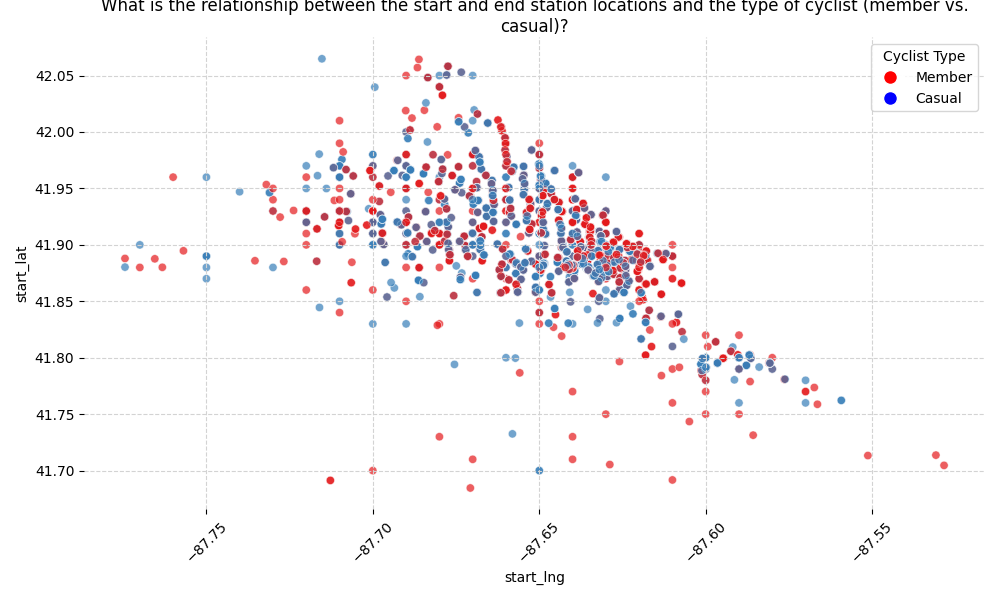

In [55]:
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
goal13_charts = lida.visualize(summary=summary, goal=goals[13], textgen_config=textgen_config, library=library)  
goal13_charts[0]

# Generate Insight Goals

### Collecting Insights

In [112]:
# Collecting Insights

collected_insights = [
    goal15_insights[8],
    goal5_insights[1],
    goal0_insights[6]
]

for insight in collected_insights:
    display(insight)


### Insight 8
---
**Insight:** The overall pattern of ride counts suggests that casual riders may be more influenced by social or recreational factors, while members are driven by practical commuting needs, highlighting different motivations for bike usage.



### Insight 1
---
**Insight:** The contrast in usage patterns between casual riders and members highlights a potential segmentation in the biking community, where casual riders are more inclined to use bikes for leisure on weekends, while members may rely on biking as a consistent mode of transportation during the week.



### Insight 6
---
**Insight:** The data indicates that while both groups prefer classic bikes, the distinct preference for electric bikes among casual riders could suggest a potential pathway for converting casual riders into annual members by promoting the benefits of classic biking experiences.


### Insight Goal: Insight 6

The data indicates that while both groups prefer classic bikes, the distinct preference for electric bikes among casual riders could suggest a potential pathway for converting casual riders into annual members by promoting the benefits of classic biking experiences.

In [113]:
textgen_config = TextGenerationConfig(n=1, temperature=0.5, presence_penalty=0.5, use_cache=False)
goal0_insight6_goals = lida.goals(summary=summary, n=5, textgen_config=textgen_config, goal=personal_goals[0], prompts=goal0_prompts, insights=[goal0_insights[6]], answers=goal0_answers)

for insight_goal in goal0_insight6_goals:
    display(insight_goal)


You are an experienced data analyst who can generate a given number of insightful GOALS about INSIGHTS that a user has about their data that will allow them to explore their INSIGHT deeper and make meaningful connections between them and their data. The VISUALIZATIONS YOU RECOMMEND MUST FOLLOW VISUALIZATION BEST PRACTICES (e.g., must use bar charts instead of pie charts for comparing quantities) AND BE MEANINGFUL (e.g., plot longitude and latitude on maps where appropriate). They must also be relevant to the specified persona AND always be related to the insight of the user. Each goal must include a question (THE QUESTION MUST REFERENCE A PART OF AN INSIGHT), a visualization (THE VISUALIZATION MUST REFERENCE THE EXACT COLUMN FIELDS FROM THE SUMMARY), and a rationale (JUSTIFICATION FOR WHICH dataset FIELDS ARE USED, what we will learn from the visualization AND how the question can allow the user to explore their insights deeper). Each goal MUST mention the exact fields from the datase


### Goal 0
---
**Question:** How does the frequency of rideable type usage vary by time of day for casual riders compared to annual members?

**Visualization:** `line chart of count of rideable_type over hour of day, grouped by member_casual`

**Rationale:** This visualization will reveal patterns in bike usage throughout the day, allowing us to see if casual riders prefer electric bikes during specific times compared to classic bikes used by annual members. Understanding these trends can help tailor promotional strategies to convert casual riders into annual members, aligning with the user's insight about the potential pathway for membership.



### Goal 1
---
**Question:** What are the most popular start stations for each rideable type among casual riders versus annual members?

**Visualization:** `bar chart of start_station_name grouped by rideable_type and member_casual`

**Rationale:** This visualization will highlight the preferences for start stations based on rideable type and membership status. By analyzing which stations are favored by casual riders for electric bikes versus classic bikes used by members, we can identify strategic locations for marketing efforts aimed at converting casual riders to members, thereby deepening our understanding of the user's insight.



### Goal 2
---
**Question:** What is the average ride duration for casual riders using electric bikes compared to annual members using classic bikes?

**Visualization:** `box plot of ride duration (calculated from started_at and ended_at) grouped by rideable_type and member_casual`

**Rationale:** This visualization will provide insights into how ride duration varies between different bike types and membership categories. If casual riders using electric bikes have significantly shorter rides than members using classic bikes, it may indicate a difference in riding behavior that could inform targeted promotions to encourage longer rides and potential membership conversion.



### Goal 3
---
**Question:** Is there a correlation between the distance traveled and the rideable type used by casual riders versus annual members?

**Visualization:** `scatter plot of distance (calculated from start_lat, start_lng, end_lat, end_lng) versus rideable_type, colored by member_casual`

**Rationale:** This visualization will explore the relationship between the distance traveled and the type of bike used by each membership category. Understanding whether casual riders tend to travel shorter distances on electric bikes compared to classic bike users can provide insights into their riding habits and preferences, helping to validate or challenge the user's insights about potential pathways for membership.



### Goal 4
---
**Question:** What percentage of total rides does each rideable type represent for casual riders compared to annual members?

**Visualization:** `stacked bar chart of percentage of total rides by rideable_type, segmented by member_casual`

**Rationale:** This visualization will clearly illustrate the proportion of each rideable type used by casual riders versus annual members. By identifying the dominance of classic bikes among members and the significant preference for electric bikes among casual riders, we can derive actionable insights for marketing strategies that leverage these preferences to encourage casual riders to transition into annual memberships.


### Insight Goal: Goal 15

The overall pattern of ride counts suggests that casual riders may be more influenced by social or recreational factors, while members are driven by practical commuting needs, highlighting different motivations for bike usage.

In [114]:
textgen_config = TextGenerationConfig(n=1, temperature=0.5, presence_penalty=0.5, use_cache=False)
goal15_insight8_goals = lida.goals(summary=summary, n=5, textgen_config=textgen_config, goal=personal_goals[15], prompts=goal15_prompts, insights=[goal15_insights[8]], answers=goal15_answers)

for insight_goal in goal15_insight8_goals:
    display(insight_goal)


You are an experienced data analyst who can generate a given number of insightful GOALS about INSIGHTS that a user has about their data that will allow them to explore their INSIGHT deeper and make meaningful connections between them and their data. The VISUALIZATIONS YOU RECOMMEND MUST FOLLOW VISUALIZATION BEST PRACTICES (e.g., must use bar charts instead of pie charts for comparing quantities) AND BE MEANINGFUL (e.g., plot longitude and latitude on maps where appropriate). They must also be relevant to the specified persona AND always be related to the insight of the user. Each goal must include a question (THE QUESTION MUST REFERENCE A PART OF AN INSIGHT), a visualization (THE VISUALIZATION MUST REFERENCE THE EXACT COLUMN FIELDS FROM THE SUMMARY), and a rationale (JUSTIFICATION FOR WHICH dataset FIELDS ARE USED, what we will learn from the visualization AND how the question can allow the user to explore their insights deeper). Each goal MUST mention the exact fields from the datase


### Goal 0
---
**Question:** How do ride counts for casual riders compare to members during specific peak hours, specifically at 7:00 and 18:00?

**Visualization:** `bar chart comparing ride counts at 7:00 and 18:00 segmented by member_casual`

**Rationale:** This visualization will help us understand the differences in usage patterns during critical times of the day. By focusing on the peak hours identified in the user's insights, we can analyze how casual riders are more influenced by social factors compared to members who may be commuting. This could reveal whether casual riders are utilizing bikes for recreational purposes during peak times, which is crucial for optimizing bike availability and marketing strategies.



### Goal 1
---
**Question:** What percentage of rides taken by casual users occur during non-peak hours (e.g., 4:00 to 6:00) compared to members?

**Visualization:** `stacked bar chart showing the percentage of rides by member_casual during peak vs. non-peak hours`

**Rationale:** This visualization will allow us to explore the distribution of rides between casual and member users during off-peak hours, highlighting their differing motivations. Understanding the lower usage of casual riders during these hours can help identify opportunities for targeted campaigns or promotional offers to increase engagement, thus validating the insight about their social or recreational riding patterns.



### Goal 2
---
**Question:** Is there a correlation between the type of bike used (rideable_type) and the peak hours of usage for casual versus member riders?

**Visualization:** `line chart showing ride counts over time segmented by rideable_type and member_casual`

**Rationale:** This visualization will help determine if specific bike types are favored by either casual riders or members during peak hours. If casual riders prefer electric bikes during recreational times, while members lean towards classic bikes for commuting, this could provide insights into user preferences and help improve bike fleet management. This directly ties back to the user's insight about different motivations for bike usage.



### Goal 3
---
**Question:** How does the average duration of rides for casual users compare to members during peak commuting hours (e.g., 7:00 to 9:00)?

**Visualization:** `box plot comparing average ride duration during peak hours segmented by member_casual`

**Rationale:** This visualization will provide insights into how ride durations differ between casual and member users during the morning rush. If casual riders have shorter ride durations compared to members, it could reinforce the idea that members are using bikes primarily for commuting. Understanding these patterns could help in tailoring services or offers specifically designed for each group, further exploring the user's insight regarding their motivations.



### Goal 4
---
**Question:** What are the most popular start and end stations for casual riders compared to members during the identified peak hours?

**Visualization:** `heatmap showing ride counts by start and end station segmented by member_casual`

**Rationale:** This visualization will highlight the geographical preferences of casual versus member riders during peak times. Identifying popular stations can inform strategic placement of bikes and resources, as well as help in planning future station developments. By examining these patterns, we can delve deeper into the motivations behind the users' choices and validate the insight regarding their differing usage behaviors.


### Insight Goals: Goal 15 and Goal 5

In [119]:
textgen_config = TextGenerationConfig(n=1, temperature=0.5, presence_penalty=0.5, use_cache=False)
goal15_insight8_goals = lida.goals(summary=summary, n=5, textgen_config=textgen_config, goal=personal_goals[15], prompts=goal15_prompts, insights=[goal15_insights[8], goal5_insights[1]], answers=goal15_answers)

for insight_goal in goal15_insight8_goals:
    display(insight_goal)


You are an experienced data analyst who can generate a given number of insightful GOALS about INSIGHTS that a user has about their data that will allow them to explore their INSIGHT deeper and make meaningful connections between them and their data. The VISUALIZATIONS YOU RECOMMEND MUST FOLLOW VISUALIZATION BEST PRACTICES (e.g., must use bar charts instead of pie charts for comparing quantities) AND BE MEANINGFUL (e.g., plot longitude and latitude on maps where appropriate). They must also be relevant to the specified persona AND always be related to the insight of the user. Each goal must include a question (THE QUESTION MUST REFERENCE A PART OF AN INSIGHT), a visualization (THE VISUALIZATION MUST REFERENCE THE EXACT COLUMN FIELDS FROM THE SUMMARY), and a rationale (JUSTIFICATION FOR WHICH dataset FIELDS ARE USED, what we will learn from the visualization AND how the question can allow the user to explore their insights deeper). Each goal MUST mention the exact fields from the datase


### Goal 0
---
**Question:** How do ride counts differ between casual riders and members across different types of bikes?

**Visualization:** `bar chart comparing ride counts by rideable_type, segmented by member_casual`

**Rationale:** This visualization uses the 'rideable_type' and 'member_casual' fields to compare how different bike types are utilized by casual riders versus members. Understanding which types of bikes are preferred by each group can provide insight into their motivations for biking, supporting the insight that casual riders may be more influenced by recreational factors while members rely on practical commuting needs.



### Goal 1
---
**Question:** What is the average duration of rides for casual riders compared to members during peak hours?

**Visualization:** `box plot of ride durations segmented by member_casual during peak hours (17:00-18:00)`

**Rationale:** This visualization will utilize the 'started_at' and 'ended_at' fields to calculate ride durations and segment them by 'member_casual' during the identified peak hours. Analyzing ride duration can reveal whether casual riders are using bikes for shorter leisure trips compared to longer commutes by members, thus allowing for a deeper understanding of their differing motivations.



### Goal 2
---
**Question:** Which stations are most frequently used by casual riders compared to members during weekends?

**Visualization:** `heatmap of start_station_name usage segmented by member_casual for weekend rides`

**Rationale:** Using the 'start_station_name' field, this heatmap will visualize the frequency of bike usage at different stations for casual riders and members on weekends. This can help identify popular leisure destinations for casual riders and commuting hubs for members, aligning with the insight about usage patterns and segmentation in the biking community.



### Goal 3
---
**Question:** What trends can we observe in the distribution of ride counts among casual riders and members across weekdays versus weekends?

**Visualization:** `stacked bar chart of ride counts by day of the week, segmented by member_casual`

**Rationale:** This visualization will leverage the 'started_at' field to extract the day of the week for each ride, allowing us to compare ride counts between casual riders and members. By visualizing this data, we can confirm the hypothesis that casual riders are more active on weekends while members maintain consistent usage throughout the week, further exploring the segmentation of the biking community.



### Goal 4
---
**Question:** What is the relationship between ride counts and the time of day for casual riders and members?

**Visualization:** `scatter plot of ride counts by hour of the day, colored by member_casual`

**Rationale:** This scatter plot will utilize the 'started_at' field to analyze ride counts across different hours of the day for both casual riders and members. This visualization will help us explore the specific times when the gap in usage is largest, providing insights into how time influences biking behavior and confirming patterns observed in previous analyses.
